In [38]:
#Imports

#Tensorflow
# Neural networks.
import tensorflow.keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras import utils
#Numpy
import numpy as np
#Panda
import pandas as pd
#Sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#matplotlib
import matplotlib.pyplot as plt


In [39]:
#Consant for Column names
COLUMN_NAMES = ['Speed', 'Power']
#Read in csv file
data = pd.read_csv(
    "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
data.head()





speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0
3  0.225    0.0
4  0.275    0.0

In [40]:
# convert data into an array
dataset = data.values
#Print out array
dataset

array([[0.00000e+00, 0.00000e+00],
       [1.25000e-01, 0.00000e+00],
       [1.50000e-01, 0.00000e+00],
       [2.25000e-01, 0.00000e+00],
       [2.75000e-01, 0.00000e+00],
       [3.25000e-01, 4.33100e+00],
       [4.00000e-01, 5.18600e+00],
       [4.50000e-01, 3.82600e+00],
       [5.01000e-01, 1.04800e+00],
       [5.26000e-01, 5.55300e+00],
       [5.51000e-01, 6.49800e+00],
       [5.76000e-01, 5.24100e+00],
       [6.26000e-01, 4.22000e+00],
       [6.76000e-01, 7.97400e+00],
       [7.01000e-01, 9.74600e+00],
       [7.26000e-01, 0.00000e+00],
       [7.51000e-01, 0.00000e+00],
       [8.01000e-01, 7.27100e+00],
       [8.26000e-01, 7.95000e-01],
       [8.51000e-01, 7.35000e+00],
       [9.26000e-01, 1.99600e+00],
       [9.51000e-01, 1.60900e+00],
       [9.76000e-01, 2.06400e+00],
       [1.00100e+00, 6.51100e+00],
       [1.02600e+00, 0.00000e+00],
       [1.05100e+00, 2.08500e+00],
       [1.07600e+00, 0.00000e+00],
       [1.10100e+00, 1.21000e-01],
       [1.15100e+00,

In [41]:
"""
split  dataset into input features (X) 
assign the first 10 columns of our array to a variable called X 
""" 
X = data['speed']
"""
feature we wish to predict (Y).
assign the last column of our array to a variable called Y
""" 
Y = data['power']



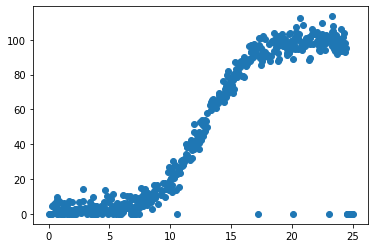

In [42]:
plt.plot(X,Y,'o')

In [43]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [44]:
# Train the neural network on our training data.
# change ctach size to 10
model.fit(data['speed'], data['power'], epochs=100, batch_size=5)

Epoch 1/100
100/100 [==============================] - 2s 12ms/step - loss: 3730.4648
Epoch 2/100
100/100 [==============================] - 1s 8ms/step - loss: 3610.0411
Epoch 3/100
100/100 [==============================] - 1s 9ms/step - loss: 3023.1911
Epoch 4/100
100/100 [==============================] - 1s 8ms/step - loss: 2537.6105
Epoch 5/100
100/100 [==============================] - 1s 7ms/step - loss: 2547.5704
Epoch 6/100
100/100 [==============================] - 1s 15ms/step - loss: 2201.2943 0s - loss: 2201.
Epoch 7/100
100/100 [==============================] - 1s 9ms/step - loss: 2036.5286
Epoch 8/100
100/100 [==============================] - 1s 10ms/step - loss: 1875.5403
Epoch 9/100
100/100 [==============================] - 1s 9ms/step - loss: 1883.9697
Epoch 10/100
100/100 [==============================] - 1s 10ms/step - loss: 1493.9077
Epoch 11/100
100/100 [==============================] - 1s 8ms/step - loss: 1507.1857
Epoch 12/100
100/100 [====================

100/100 [==============================] - 1s 7ms/step - loss: 449.7399
Epoch 95/100
100/100 [==============================] - 1s 5ms/step - loss: 392.6278
Epoch 96/100
100/100 [==============================] - 1s 11ms/step - loss: 225.8476
Epoch 97/100
100/100 [==============================] - 1s 10ms/step - loss: 372.9956
Epoch 98/100
100/100 [==============================] - 1s 11ms/step - loss: 238.0556
Epoch 99/100
100/100 [==============================] - 1s 7ms/step - loss: 381.1214
Epoch 100/100
100/100 [==============================] - 1s 14ms/step - loss: 319.3301: 0s - 


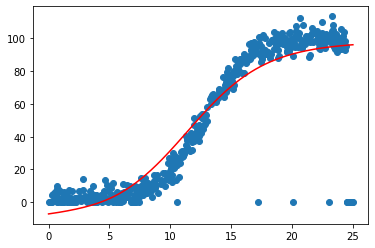

In [45]:
predictions = model.predict(data['speed'])
plt.plot(X,Y,'o')
plt.plot(X,predictions,color = 'red')

In [50]:
#Find test accuracy
scores = model.evaluate(X, Y)

16/16 [==============================] - 0s 10ms/step - loss: 307.3126


In [51]:
#Save model
model.save('model.h5')
print("Saved model" )

Saved model


In [54]:
#change accuracy
model.predict([10.0])

array([[31.498953]], dtype=float32)

In [ ]:
#scale dataset so that all the input features lie between 0 and 1 inclusive:
 
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


"""
split dataset
X_val_and_test size will be 30% of the overall dataset.
X_val_and_test size will be 50% of the overall dataset.
"""
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
#Print
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


NameError: name 'X_test' is not defined

In [ ]:
#Save model
model.save('model.h5')
print("Saved model" )

In [45]:
"""
specify Keras sequential model
- store our model in the variable ‘model’

- First layer: a dense layer with 32 neurons, ReLU activation and the input shape is 1 
- Second layer: Dense layer with 32 neurons, ReLU activation. 
- Third layer: Dense layer with 1 neuron, sigmoid activation

"""
model = Sequential([    Dense(32, activation='relu', input_shape=(1,)),    Dense(32, activation='relu'),    Dense(1, activation='sigmoid'),])
"""
sgd: stochastic gradient descent. Mini batch gradient
loss: The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
metrics: track accuracy on top of the loss function.

"""
model.compile(optimizer='sgd',              loss='binary_crossentropy',              metrics=['accuracy'])
"""
Training data
Size of batch
how long to train it for (epochs)
validation data tells us how we are doing on each point

"""
hist = model.fit(X_train, Y_train,        
batch_size=32, epochs=200,          
validation_data=(X_val, Y_val))


Epoch 1/200
11/11 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.0486 - val_loss: nan - val_accuracy: 0.0800
Epoch 2/200
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1108 - val_loss: nan - val_accuracy: 0.0800
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1216 - val_loss: nan - val_accuracy: 0.0800
Epoch 4/200
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1071 - val_loss: nan - val_accuracy: 0.0800
Epoch 5/200
11/11 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1342 - val_loss: nan - val_accuracy: 0.0800
Epoch 6/200
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0971 - val_loss: nan - val_accuracy: 0.0800
Epoch 7/200
11/11 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.1200 - val_loss: nan - val_accuracy: 0.0800
Epoch 8/200
11/11 [==============================] - 

11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.1069 - val_loss: nan - val_accuracy: 0.0800
Epoch 122/200
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1229 - val_loss: nan - val_accuracy: 0.0800
Epoch 123/200
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0930 - val_loss: nan - val_accuracy: 0.0800
Epoch 124/200
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.1065 - val_loss: nan - val_accuracy: 0.0800
Epoch 125/200
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1231 - val_loss: nan - val_accuracy: 0.0800
Epoch 126/200
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.1134 - val_loss: nan - val_accuracy: 0.0800
Epoch 127/200
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1280 - val_loss: nan - val_accuracy: 0.0800
Epoch 128/200
11/11 [==============================] - 

Epoch 181/200
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0888 - val_loss: nan - val_accuracy: 0.0800
Epoch 182/200
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0917 - val_loss: nan - val_accuracy: 0.0800
Epoch 183/200
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0790 - val_loss: nan - val_accuracy: 0.0800
Epoch 184/200
11/11 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.1155 - val_loss: nan - val_accuracy: 0.0800
Epoch 185/200
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.1042 - val_loss: nan - val_accuracy: 0.0800
Epoch 186/200
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.1276 - val_loss: nan - val_accuracy: 0.0800
Epoch 187/200
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.1213 - val_loss: nan - val_accuracy: 0.0800
Epoch 188/200
11/11 [====================

In [46]:
#Find test accuracy
scores = model.evaluate(X_test, Y_test)[1]



3/3 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0667


In [47]:
#Save model
model.save('model.h5')
print("Saved model" )

Saved model


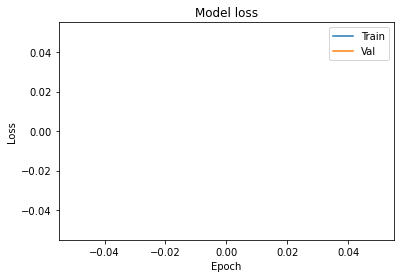

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/
https://realpython.com/python-keyerror/
https://stackoverflow.com/questions/23327293/flask-raises-templatenotfound-error-even-though-template-file-exists
https://rubikscode.net/2020/02/10/deploying-machine-learning-models-pt-1-flask-and-rest-api/
